In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cherskiy ru
mataura pf
atuona pf
ushuaia ar
geraldton au
faya td
quelimane mz
college us
port alfred za
illoqqortoormiut gl
puerto ayora ec
pingliang cn
barrow us
hegang cn
kenema sl
ouesso cg
yellowknife ca
ushuaia ar
salalah om
tasiilaq gl
hilo us
zhigansk ru
ushtobe kz
banff ca
mahebourg mu
albany au
nizhneyansk ru
pimenta bueno br
torva ee
dandong cn
ushuaia ar
ambilobe mg
matagami ca
hobart au
ileza ru
mataura pf
saskylakh ru
sovetsk ru
taolanaro mg
ushuaia ar
san patricio mx
mataura pf
provideniya ru
ushuaia ar
butaritari ki
mataura pf
mitchell us
waitara nz
gormi in
busselton au
ushuaia ar
cherskiy ru
nouadhibou mr
carnarvon au
agadez ne
rikitea pf
ambilobe mg
ugep ng
amberieu-en-bugey fr
sikasso ml
taolanaro mg
carballo es
kousseri cm
albany au
dauphin ca
tsihombe mg
ornskoldsvik se
mendahara id
bathsheba bb
prescott us
moron mn
mataura pf
lebu cl
chokurdakh ru
laguna br
kodiak us
ribeira grande pt
hilo us
constitucion mx
arraial do cabo br
farrukhnagar in
kapaa us
saskylakh ru

castro cl
new norfolk au
port elizabeth za
vaini to
richards bay za
taolanaro mg
ilulissat gl
barentsburg sj
coquimbo cl
zhangye cn
opuwo na
hilo us
norman wells ca
boden se
albany au
norman wells ca
rio tercero ar
mahebourg mu
severo-kurilsk ru
saint george bm
cayenne gf
mildura au
sinnamary gf
warwick au
tuktoyaktuk ca
upernavik gl
thurso gb
clyde river ca
beringovskiy ru
waipawa nz
ushuaia ar
rikitea pf
norman wells ca
umzimvubu za
bluff nz
tiksi ru
rikitea pf
dingle ie
ponta do sol cv
bredasdorp za
beloha mg
fare pf
mackay au
tasbuget kz
faanui pf
nagato jp
puerto ayora ec
illoqqortoormiut gl
fortuna us
atuona pf
kasama zm
saldanha za
bambous virieux mu
busselton au
ushuaia ar
hithadhoo mv
celestun mx
souillac mu
punta arenas cl
kruisfontein za
vaini to
tabou ci
waddan ly
lucapa ao
aljezur pt
lasa cn
henderson us
linjiang cn
vaini to
aden ye
bathsheba bb
port alfred za
ushuaia ar
saint george bm
lebu cl
necochea ar
hilo us
arraial do cabo br
rungata ki
albany au
aswan eg
armidale a

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [8]:
import requests
requests.__version__

'2.25.1'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | faya
Processing Record 7 of Set 1 | quelimane
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | pingliang
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | hegang
Processing Record 15 of Set 1 | kenema
Processing Record 16 of Set 1 | ouesso
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | zhigansk
Processing Record 22 of Set 1 | ushtobe
Processing Record 23 

Processing Record 39 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 40 of Set 4 | sobolevo
Processing Record 41 of Set 4 | scarborough
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | panguna
Processing Record 45 of Set 4 | igrim
Processing Record 46 of Set 4 | chapais
Processing Record 47 of Set 4 | matara
Processing Record 48 of Set 4 | price
Processing Record 49 of Set 4 | gamba
Processing Record 50 of Set 4 | el sauzal
Processing Record 1 of Set 5 | wahran
City not found. Skipping...
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | qaqortoq
Processing Record 4 of Set 5 | maneadero
Processing Record 5 of Set 5 | santa isabel do rio negro
Processing Record 6 of Set 5 | saint-pierre
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | fort-shevchenko
Processing Record 9 of Set 5 | bone
Processing Record 10 of Set 5 | worland
Processing Record 11 of Set 5 | vil

Processing Record 35 of Set 8 | nagato
Processing Record 36 of Set 8 | kasama
Processing Record 37 of Set 8 | celestun
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | waddan
Processing Record 40 of Set 8 | lucapa
Processing Record 41 of Set 8 | aljezur
Processing Record 42 of Set 8 | lasa
Processing Record 43 of Set 8 | henderson
Processing Record 44 of Set 8 | linjiang
Processing Record 45 of Set 8 | aden
Processing Record 46 of Set 8 | necochea
Processing Record 47 of Set 8 | aswan
Processing Record 48 of Set 8 | armidale
Processing Record 49 of Set 8 | korsakov
Processing Record 50 of Set 8 | gorontalo
Processing Record 1 of Set 9 | paradwip
City not found. Skipping...
Processing Record 2 of Set 9 | kansanshi
Processing Record 3 of Set 9 | rio pardo de minas
Processing Record 4 of Set 9 | port macquarie
Processing Record 5 of Set 9 | truth or consequences
Processing Record 6 of Set 9 | praia da vitoria
Processing Record 7 of Set 9 | takoradi
Processing Record 8

Processing Record 21 of Set 12 | jabiru
City not found. Skipping...
Processing Record 22 of Set 12 | azad shahr
Processing Record 23 of Set 12 | taoudenni
Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | ust-nera
Processing Record 26 of Set 12 | hambantota
Processing Record 27 of Set 12 | gurupa
Processing Record 28 of Set 12 | tres picos
Processing Record 29 of Set 12 | ubinskoye
Processing Record 30 of Set 12 | frederico westphalen
Processing Record 31 of Set 12 | ahipara
Processing Record 32 of Set 12 | tual
Processing Record 33 of Set 12 | chemal
Processing Record 34 of Set 12 | teguldet
Processing Record 35 of Set 12 | mithimna
City not found. Skipping...
Processing Record 36 of Set 12 | srednekolymsk
Processing Record 37 of Set 12 | turukhansk
Processing Record 38 of Set 12 | benguela
Processing Record 39 of Set 12 | wucheng
Processing Record 40 of Set 12 | piombino
Processing Record 41 of Set 12 | shingu
Processing Record 42 of Set 12 | porto novo
Processi

In [13]:
len(city_data)

600

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,53.35,55,76,4.83,RU,2021-08-07 19:02:13
1,Mataura,-46.1927,168.8643,34.48,99,100,1.28,NZ,2021-08-07 19:06:55
2,Atuona,-9.8000,-139.0333,76.98,82,100,17.11,PF,2021-08-07 19:06:56
3,Ushuaia,-54.8000,-68.3000,29.86,100,90,18.41,AR,2021-08-07 19:04:21
4,Geraldton,-28.7667,114.6000,63.01,94,40,10.36,AU,2021-08-07 19:06:56
5,Faya,18.3851,42.4509,64.92,67,12,4.36,SA,2021-08-07 19:04:49
6,Quelimane,-17.8786,36.8883,71.55,78,0,4.61,MZ,2021-08-07 19:06:56
7,College,64.8569,-147.8028,58.95,91,75,5.75,US,2021-08-07 19:06:57
8,Port Alfred,-33.5906,26.8910,59.95,85,84,14.09,ZA,2021-08-07 19:06:57
9,Puerto Ayora,-0.7393,-90.3518,73.54,83,71,8.99,EC,2021-08-07 19:06:57


In [15]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-08-07 19:02:13,68.7500,161.3000,53.35,55,76,4.83
1,Mataura,NZ,2021-08-07 19:06:55,-46.1927,168.8643,34.48,99,100,1.28
2,Atuona,PF,2021-08-07 19:06:56,-9.8000,-139.0333,76.98,82,100,17.11
3,Ushuaia,AR,2021-08-07 19:04:21,-54.8000,-68.3000,29.86,100,90,18.41
4,Geraldton,AU,2021-08-07 19:06:56,-28.7667,114.6000,63.01,94,40,10.36
...,...,...,...,...,...,...,...,...,...
595,San Policarpo,PH,2021-08-07 19:09:28,12.1791,125.5072,79.12,84,97,4.72
596,Goundam,ML,2021-08-07 19:09:28,16.4145,-3.6708,94.32,42,17,12.91
597,Kuusamo,FI,2021-08-07 19:09:28,65.9667,29.1833,60.84,55,0,5.75
598,Nemuro,JP,2021-08-07 19:09:29,43.3236,145.5750,68.90,97,12,4.18


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628364257.9917474

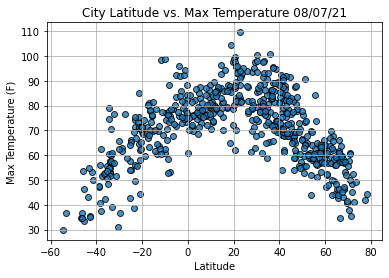

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

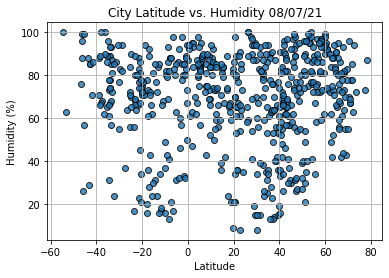

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

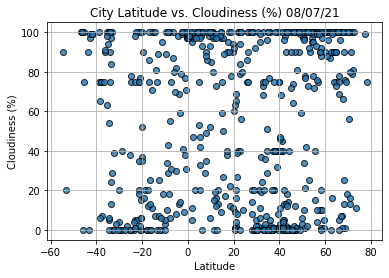

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

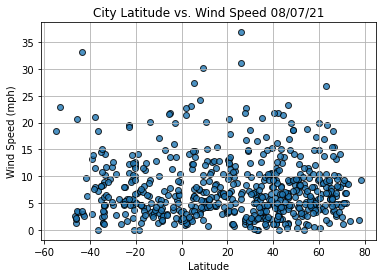

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [28]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Kenema
Country                        SL
Date          2021-08-07 19:06:58
Lat                        7.8767
Lng                      -11.1875
Max Temp                    75.94
Humidity                       75
Cloudiness                     90
Wind Speed                   3.36
Name: 13, dtype: object

In [29]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
595     True
596     True
597     True
598     True
599    False
Name: Lat, Length: 600, dtype: bool

In [30]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-08-07 19:02:13,68.7500,161.3000,53.35,55,76,4.83
5,Faya,SA,2021-08-07 19:04:49,18.3851,42.4509,64.92,67,12,4.36
7,College,US,2021-08-07 19:06:57,64.8569,-147.8028,58.95,91,75,5.75
10,Pingliang,CN,2021-08-07 19:06:58,35.5392,106.6861,65.30,61,77,3.29
11,Barrow,US,2021-08-07 19:04:14,71.2906,-156.7887,35.62,78,90,6.91


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

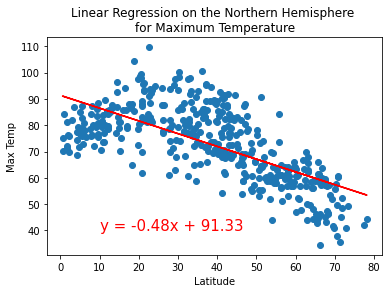

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

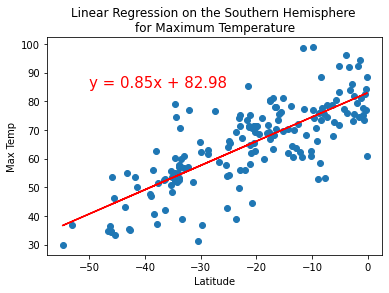

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

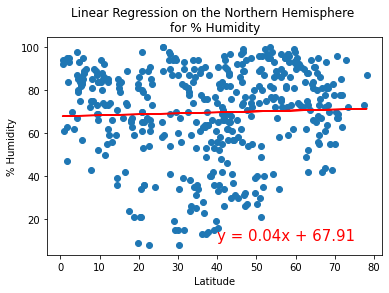

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

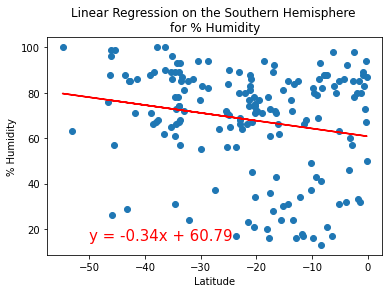

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

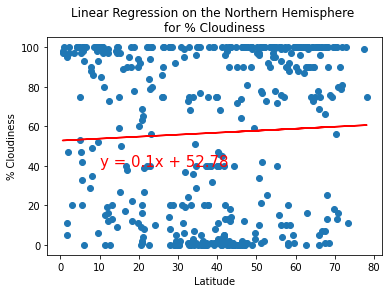

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

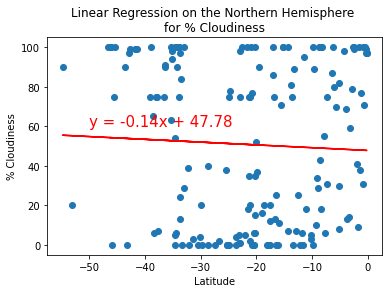

In [37]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

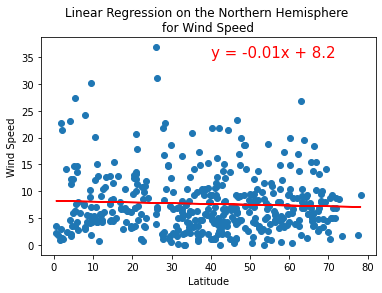

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

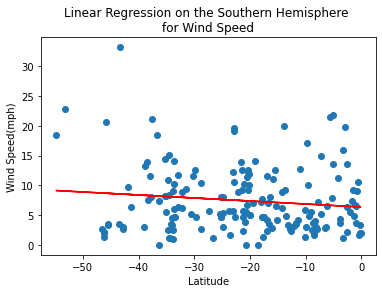

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [41]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - gmaps


The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [42]:

pip install gmaps

  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076097 sha256=9d50118a8513eabdc6340cdef0f7fb6abb1ef7f42ea6efb4d7fcffe7cc3fa321
  Stored in directory: c:\users\lengu\appdata\local\pip\cache\wheels\30\bd\87\d0d731ee712c34a4d6bace8b1dbf8c8932e22a1625b4a55be4
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.
